# Welter issue #2
## Spot Check the Pipeline Spectra
### Notebook 01

Michael Gully-Santiago  
Wednesday, November 25, 2015  

We will make plots of the pipeline spectra.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

## Raw standard star spectrum:  `20151117/SDCH_20151117_0199.spec.fits`
Read in the `.fits` files.  The `.spec.` are the 1D spectra.

In [3]:
hdu_raw = fits.open('../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0199.spec.fits')

In [4]:
hdu_raw.info()

Filename: ../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0199.spec.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     182   (2048, 28)   float32   
1                ImageHDU        87   (2048, 28)   float64   


Header/Data Unit 0 is the $N_{pix} \times N_{orders}$ **spectrum**.  
Header/Data Unit 1 is the $N_{pix} \times N_{orders}$ **wavelength solution**.  
The **metadata** about the observations are saved in the header of the spectrum.

In [5]:
#np.array(list(hdu[0].header.keys()))[0:40]

In [6]:
hdr = hdu_raw[0].header
string = 'This spectrum is of the source {OBJECT}.\n The object type is listed as: "{OBJTYPE}".\n\
 The spectra were acquired at {ACQTIME1} UTC. \n The units of the raw spectrum are {UNITS}.  \n\
 The exposure time was {EXPTIME} seconds. \n The airmass was {AMSTART}.'
formatted_string = string.format(ACQTIME1=hdr['ACQTIME1'], UNITS=hdr['UNITS'], EXPTIME=hdr['EXPTIME'],
                                 OBJECT=hdr['OBJECT'], AMSTART=hdr['AMSTART'], OBJTYPE=hdr['OBJTYPE'])
print(formatted_string)

This spectrum is of the source HR 1237.
 The object type is listed as: "STD".
 The spectra were acquired at 2015-11-18-08:39:48.860 UTC. 
 The units of the raw spectrum are ADUs.  
 The exposure time was 120.00 seconds. 
 The airmass was 1.0990.


## Single order plot.
We'll pick a single order and make a plot.

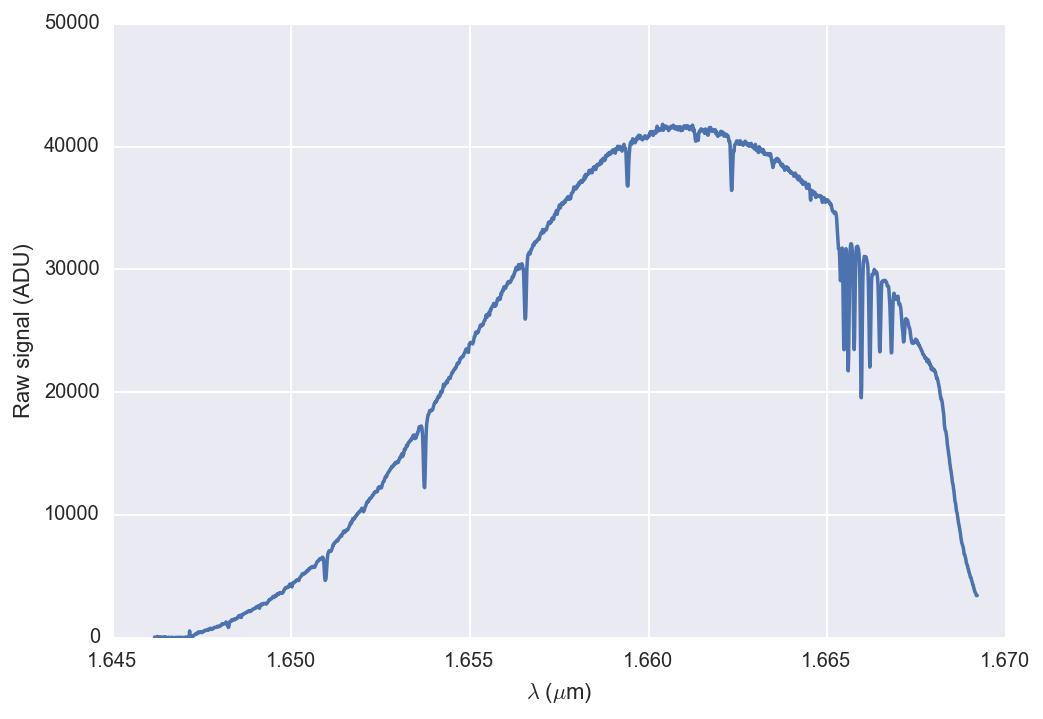

In [7]:
o=10
plt.plot(hdu_raw[1].data[o, :], hdu_raw[0].data[o, :])
plt.ylim(ymin=0)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Raw signal (ADU)");

...what we really want is the `.spec_flattened.` file.

## Flattened A0V Star: 20151117/SDCH_20151117_0199.spec_flattened.fits

In [8]:
hdu_f = fits.open('../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0199.spec_flattened.fits')

In [9]:
hdu_f.info()

Filename: ../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0199.spec_flattened.fits
No.    Name         Type      Cards   Dimensions   Format
0    SPEC_FLATTENED  PrimaryHDU     182   (2048, 28)   float64   


The header info for the flattened file is the same as the header for the raw file.

In [10]:
#hdu_f['SPEC_FLATTENED'].header[0:10]

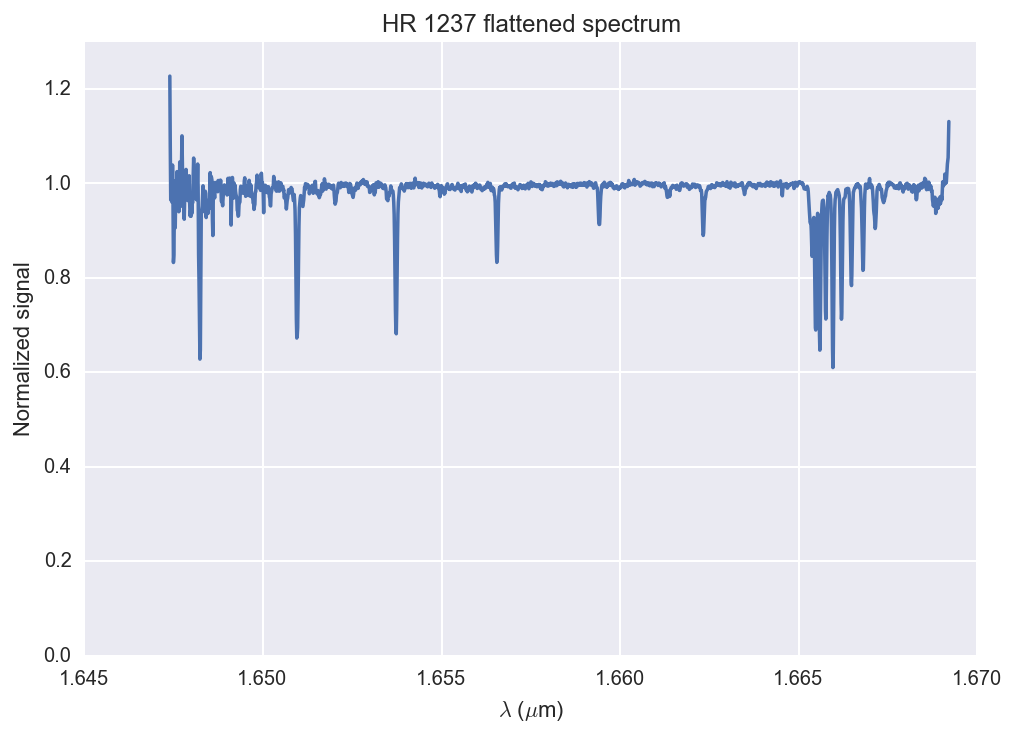

In [11]:
o=10
plt.plot(hdu_raw[1].data[o, :], hdu_f[0].data[o, :])
plt.ylim(ymin=0)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Normalized signal");
plt.title('{OBJECT} flattened spectrum'.format(OBJECT=hdr['OBJECT']));

## Science data file: `SDCH_20151117_0205.spec.fits`

In [12]:
hdu_tar = fits.open('../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0205.spec.fits')

In [13]:
hdu_tar.info()

Filename: ../data/raw/LkCa4_gully/outdata/20151117/SDCH_20151117_0205.spec.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     182   (2048, 28)   float32   
1                ImageHDU        87   (2048, 28)   float64   


In [14]:
hdr = hdu_tar[0].header
string = 'This spectrum is of the source {OBJECT}.\n The object type is listed as: "{OBJTYPE}".\n\
 The spectra were acquired at {ACQTIME1} UTC. \n The units of the raw spectrum are {UNITS}.  \n\
 The exposure time was {EXPTIME} seconds. \n The airmass was {AMSTART}.'
formatted_string = string.format(ACQTIME1=hdr['ACQTIME1'], UNITS=hdr['UNITS'], EXPTIME=hdr['EXPTIME'],
                                 OBJECT=hdr['OBJECT'], AMSTART=hdr['AMSTART'], OBJTYPE=hdr['OBJTYPE'])
print(formatted_string)

This spectrum is of the source LkCa 4.
 The object type is listed as: "TAR".
 The spectra were acquired at 2015-11-18-09:02:29.876 UTC. 
 The units of the raw spectrum are ADUs.  
 The exposure time was 300.00 seconds. 
 The airmass was 1.0734.


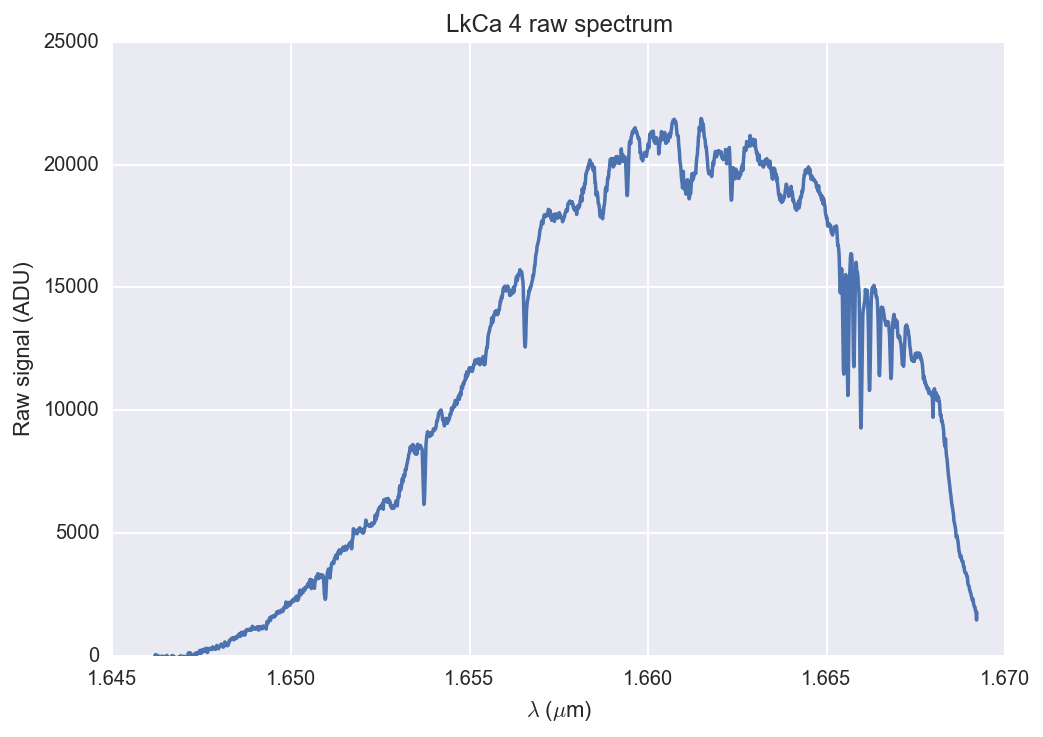

In [15]:
o=10
plt.plot(hdu_tar[1].data[o, :], hdu_tar[0].data[o, :])
plt.ylim(ymin=0)
plt.xlabel("$\lambda$ ($\mu$m)")
plt.ylabel("Raw signal (ADU)");
plt.title('{OBJECT} raw spectrum'.format(OBJECT=hdr['OBJECT']));

The next steps are:

- Estimate and divide out the spectral shape attributable to instrument response.
- Estimate and divide out the telluric transmission.

See [the next notebook](welter_issue001-Spectral_Response_Functions_01.ipynb) for dealing these next steps.

### The end.